In [10]:
import pandas as pd 
import numpy as np 
import statsmodels as sm
# for ploting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


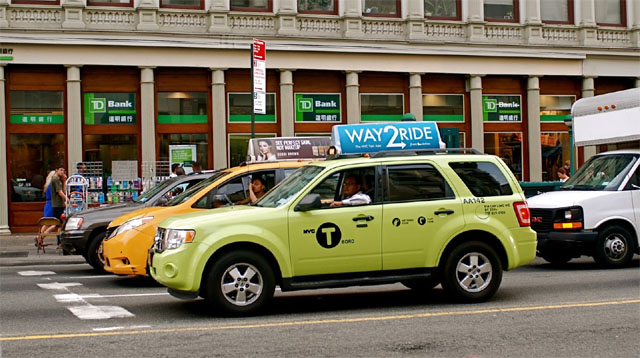

In [11]:
Image(filename='green_taxi.jpg')

## Loading dataset 

This dataset 'full_data.csv' contain 1.5 million rows
it is generated by data_cleaning.py and feature_engineering.py files,
three more columns are added 'zipcode', 'address', 'Taxi_Demand'

In [142]:
# loading dataset 1.5 millions rows 
data = pd.read_csv('full_data.csv')
print('There are %s sets of data in total'%(data.shape[0]))
#first 5 sets
data.head()

There are 1510722 sets of data in total


,Unnamed: 0,Unnamed: 0.1,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,...,improvement_surcharge,Total_amount,Payment_type,Trip_type,lenght_of_trip,Weekday,Coor,address,zipcode,Taxi_Demand
0,0,0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,...,0.3,11.80,2,1.0,605.0,0,"40.805 ,-73.939","Samen Deli, Park Avenue, East Harlem, Manhatta...",10037.0,33067
1,1,1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,...,0.3,14.30,2,1.0,1120.0,0,"40.747 ,-73.891","74-08, 37th Road, Jackson Heights, Queens Coun...",11372.0,46635
2,2,2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,...,0.3,22.56,1,1.0,1038.0,0,"40.676 ,-73.984","255, 4th Avenue, Park Slope, BK, Kings County,...",11215.0,39019
3,3,3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,...,0.3,9.30,2,1.0,403.0,0,"40.7 ,-73.808","Long Island Rail Road, Archer Avenue, Jamaica,...",11435.0,12874
4,4,4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,...,0.3,6.30,2,1.0,147.0,0,"40.745 ,-73.904","Woodside Avenue & 60th Street, Woodside Avenue...",11373.0,57819


Check for missing values and do further data cleaning

In [143]:
data.isnull().sum()

Unnamed: 0                     0
Unnamed: 0.1                   0
VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1510722
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      2
lenght_of_trip                 0
Weekday                        0
Coor                           0
address                     2568
zipcode                     2597
Taxi_Demand                    0
dtype: int64

As displayed above Ehail_fee doesn't contain data, and some address are not found. 
(address attribues were generated by fetching geographic info with python library Geopy)
geopy takes in coordinates and return addresses. the whole process will take long time with given dataset.

## Data attributes definitions

In [144]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'VendorID', 'lpep_pickup_datetime',
       'Lpep_dropoff_datetime', 'Store_and_fwd_flag', 'RateCodeID',
       'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount',
       'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'Ehail_fee',
       'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type ',
       'lenght_of_trip', 'Weekday', 'Coor', 'address', 'zipcode',
       'Taxi_Demand'],
      dtype='object')

## Remove Missing Values 

In [145]:
data.drop(['Unnamed: 0','Unnamed: 0.1','Ehail_fee'], inplace=True, axis=1)
#remove rows that contains missing values in certain columns
data = data[pd.notnull(data['address'])]
data = data[pd.notnull(data['zipcode'])]
data = data[pd.notnull(data['Trip_type '])]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


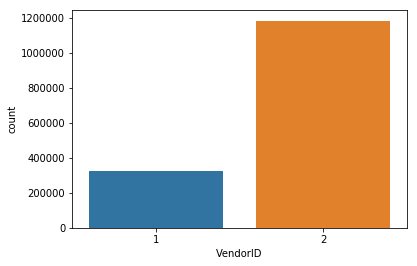

In [146]:
sns.countplot(x="VendorID", data=data)

The graph shows taht vendor number 2 is the dominating party.

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


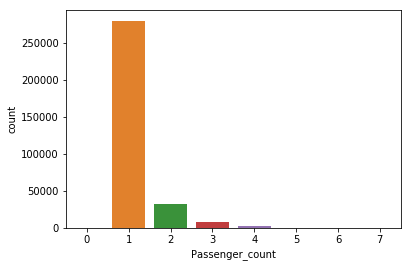

In [147]:
sns.countplot(x="Passenger_count",data=data[data['VendorID']==1])

Most of the time passenger ride the taxi alone.

## Timestamp conversion 

The column 'lpep_pickup_datetime' contains timestamps of each ride however, the type is 'str' instead of 'timestamp', hence we need to convert it first for further analogy.

In [148]:
data['lpep_pickup_datetime']=pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_pickup_datetime'][0]

Timestamp('2016-02-01 00:00:01')

In [149]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type ', 'lenght_of_trip', 'Weekday', 'Coor',
       'address', 'zipcode', 'Taxi_Demand'],
      dtype='object')

## Hourly Taxi volume bar chart

Check the hourly distribution of the Taxi ride volumes

In [150]:
hour = data.lpep_pickup_datetime.dt.hour
data['hour'] = hour

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


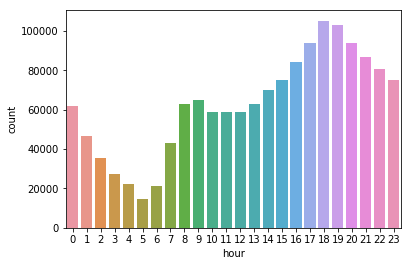

In [151]:
sns.countplot(x = 'hour', data = data)

## Payment Type Distribution

There are 5 payment types:

1."CRD" -- card, debit or credit
2."CSH" -- cash
3."DIS" -- disputed fare 
4."NOC" -- no charge
5."UNK" -- unknown

we are going to attach labels to our dataset

In [153]:
print(set(data['Payment_type'].tolist()))

{1, 2, 3, 4, 5}


In [154]:
# add label to payment methods
types = [0, 1, 2, 3, 4, 5]
group_payments = ['CRD', 'CSH', 'DIS', 'NOC', 'UNK']
data['group_payments'] = pd.cut(data['Payment_type'], types, labels=group_payments)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


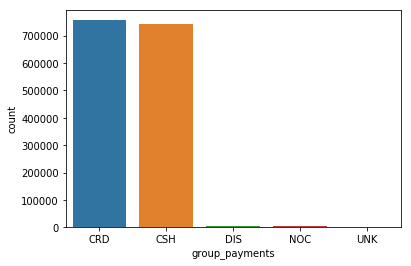

In [155]:
sns.countplot(x = 'group_payments', data = data)

As showen above people prefer to use credit card and cash credit usage is slightly higher.

## Distances Distribution

Now we can have a look into the distribution of ride distances

In [156]:
data.Trip_distance.min() , data.Trip_distance.max()

(0.0, 235.5)

Distance of ride ranges from 0 to 235 miles

In [157]:
round(data.Trip_distance.sum()/data['Trip_distance'].count(),2)

2.7400000000000002

So the avg trip distance is about 2.74 miles

In [158]:
distances = [0, 5, 10, 50, 100, 200, 250]
group_distances = ['0-5 miles', '5-10 miles', '10-50 miles', '50-100 miles', '100-200 miles', '200 miles above']
data['group_distances'] = pd.cut(data['Trip_distance'], distances, labels=group_distances)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


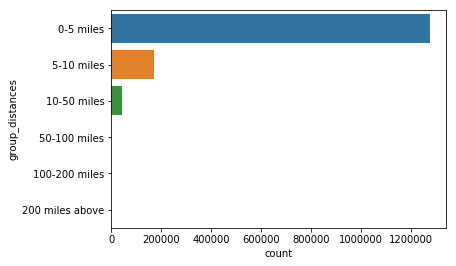

In [159]:
sns.countplot(y = 'group_distances', data = data, orient='h')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


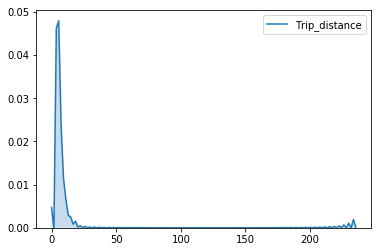

In [160]:
sns.kdeplot(data['Trip_distance'], shade=True)

As two graphs indicated above,majority of rides are within 0-5 miles ranges. 

## Taxi Service request distribution

The following analysis is to see how different ways of requesting taxi are distributed. 

In [161]:
data['Trip_type_volume'] = data.groupby('Trip_type ')['Trip_type '].transform('count')

In [162]:
print(set(data['Trip_type '].tolist()))
# 1= Street-hail，2= Dispatch

{1.0, 2.0}


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


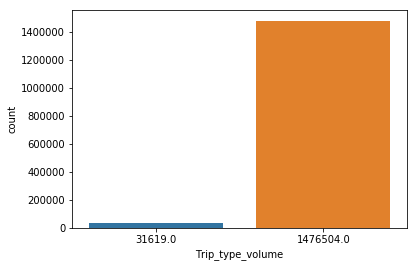

In [163]:
sns.countplot(x = 'Trip_type_volume', data = data, orient='v')

## Most Requested Pickup Location NYC weekdays

we now can have a look at the most frequently requested location in NYC during weekdays and weekends, data will be represented with treemaps. 

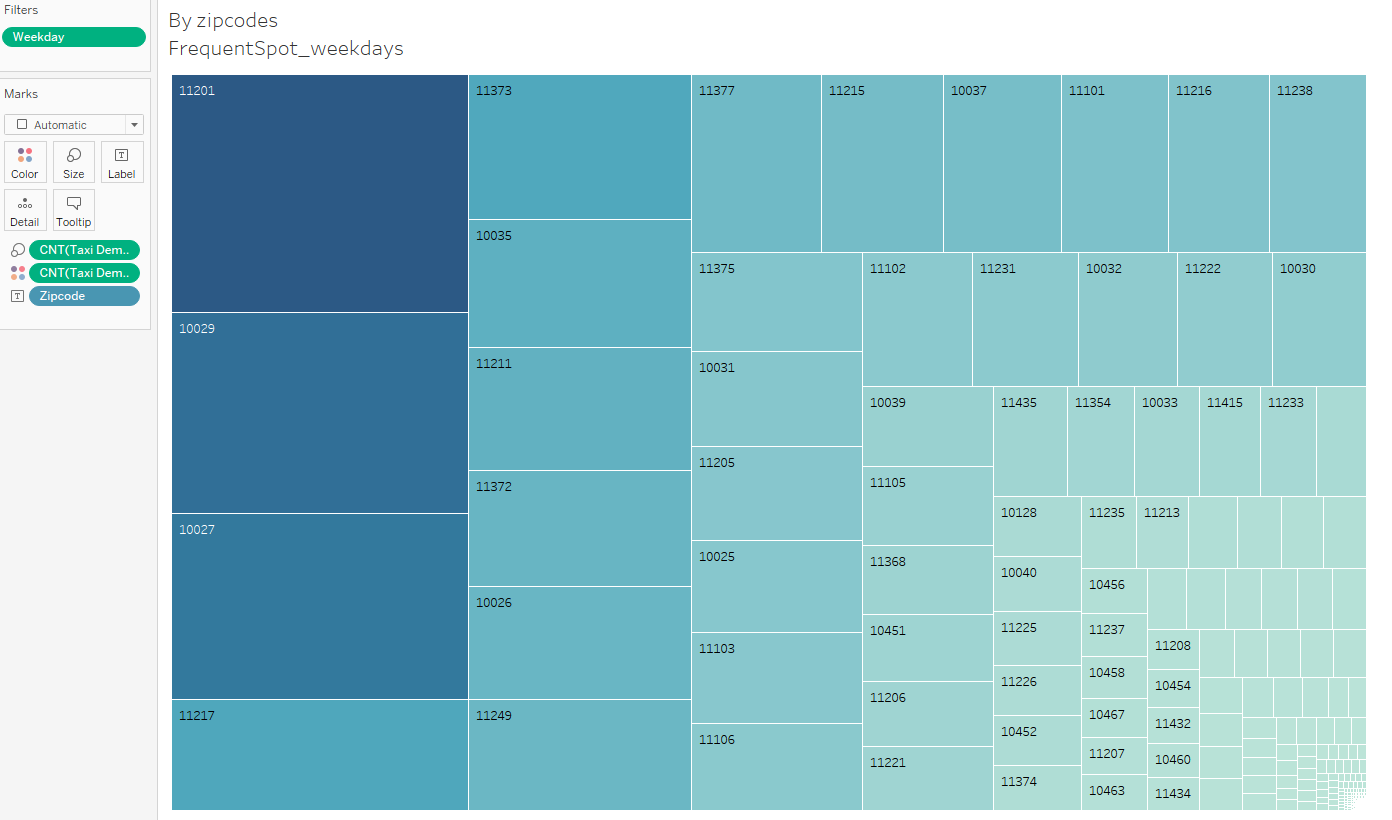

In [7]:
Image(filename='weekdays.PNG')

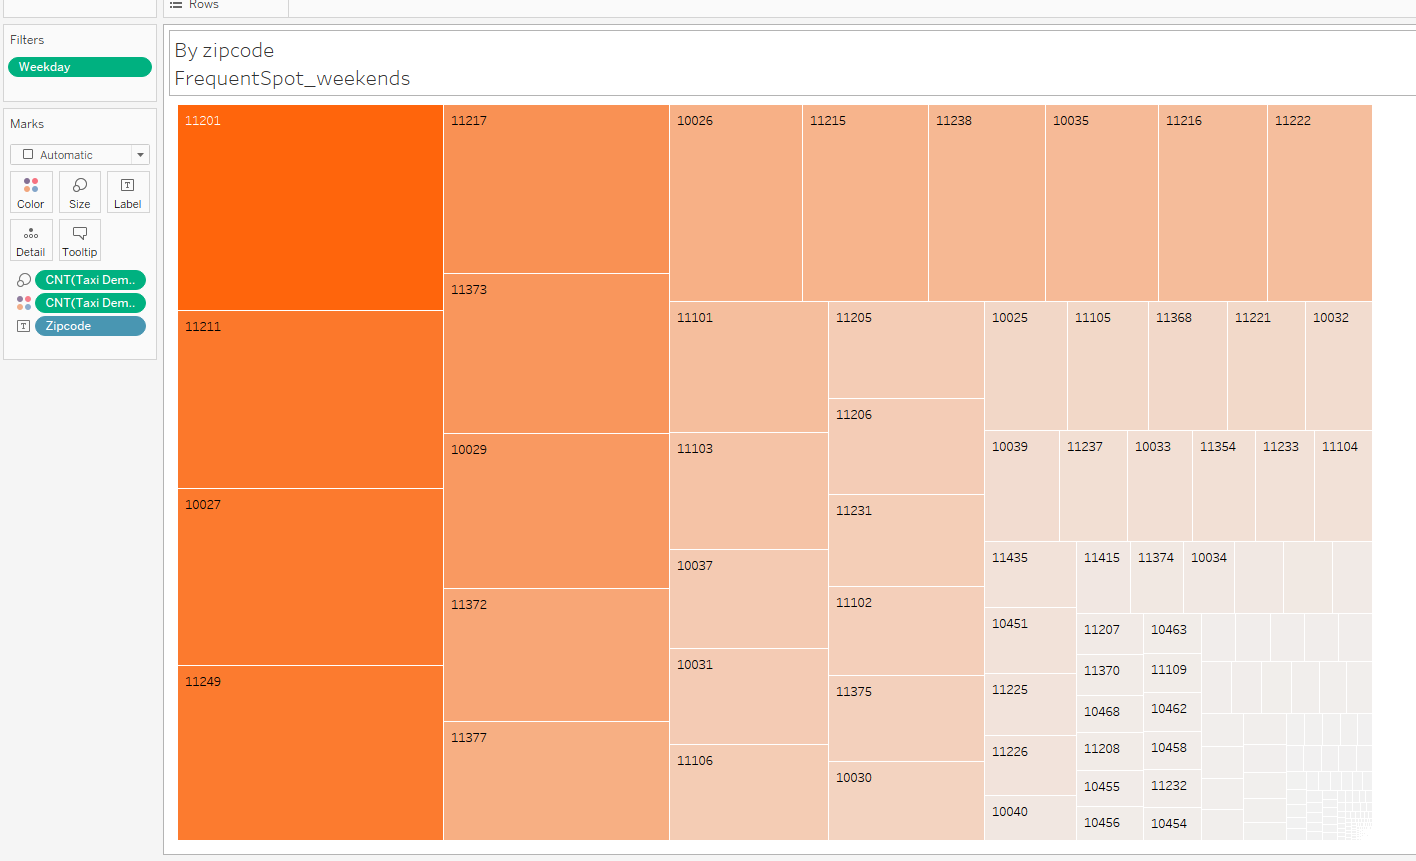

In [8]:
Image(filename='weekends.PNG')